# **Análisis Airbnb (Precio - Distancia - Tránsito)**

---

Para esta oportunidad, hemos escogido la ciudad de Londres. Teniendo en cuenta
los archivos *csv* ya predefinidos elaboraremoa un proyecto que hará un análisis de precios en función de la accesibilidad del transporte, evaluando cómo la accesibilidad del transporte público afecta los precios de los alojamientos en diferentes áreas de Londres, lo que podría ser útil para viajeros que buscan alojamiento conveniente, por ejemplo, un grupo de amigos que viaja a Londres de vacaciones por un determinado tiempo (situación hipotética que planteamos)

In [1]:
#Importamos las librerías para el análisis
import pandas as pd
import seaborn as sns
import folium
import requests
import gzip
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## **1. Carga de nuestros archivos CSV**

---

In [2]:
#Elegimos Variables para nuestra informacion
Data = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz')
Review = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/reviews.csv.gz')
Vecindario = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.csv')

<ipython-input-2-54d368c8013c>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz')


## **2. Análisis sobre Listings (propiedades)**

---

In [3]:
#Primero visualizamos la variable data para ver qué columnas usaremos
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

In [4]:
#Realizamos una vista previa de toda nuestra tabla
Data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1,0,1,0,1.21


In [5]:
#Elegimos las columnas que usaremos para nuestra analisis
DataImportante = Data[['id', 'host_id', 'description', 'neighborhood_overview', 'host_name', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed', 'price', 'review_scores_rating','latitude','longitude']]
DataImportante.head()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
0,92644,498201,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,Dee Dee,f,NaN,Wandsworth,$42.00,4.57,51.44201,-0.18739
1,93015,499704,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,Sarah,f,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,$175.00,4.82,51.49993,-0.21707
2,13913,54730,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,Alina,f,"Islington, Greater London, United Kingdom",Islington,$79.00,4.80,51.56861,-0.11270
3,15400,60302,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,Philippa,f,"London, United Kingdom",Kensington and Chelsea,$150.00,4.80,51.48780,-0.16813
4,93734,497514,<b>During your stay</b><br />I’m a professiona...,NaN,William,t,NaN,Greenwich,$46.00,4.62,51.47618,0.01442


In [6]:
#Eliminamos los valores que se muestren como "Nan"
DataImportante.dropna()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
1,93015,499704,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,Sarah,f,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,$175.00,4.82,51.499930,-0.217070
2,13913,54730,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,Alina,f,"Islington, Greater London, United Kingdom",Islington,$79.00,4.80,51.568610,-0.112700
3,15400,60302,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,Philippa,f,"London, United Kingdom",Kensington and Chelsea,$150.00,4.80,51.487800,-0.168130
5,17402,67564,"You'll have a great time in this beautiful, cl...","Fitzrovia is a very desirable trendy, arty and...",Liz,t,"London, Fitzrovia, United Kingdom",Westminster,$476.00,4.76,51.521950,-0.140940
7,24328,41759,"Artist house, bright high ceiling rooms for bo...","- Battersea is a quiet family area, easy acces...",Joe,f,"London, United Kingdom",Wandsworth,$250.00,4.90,51.470720,-0.162660
...,...,...,...,...,...,...,...,...,...,...,...,...
86877,967814336513758661,6111530,Two bed apartment consisting of a master bedro...,Close to Collis School an Outstanding primary ...,Hannah,t,"Greater London, England, United Kingdom",Richmond upon Thames,$150.00,5.00,51.421560,-0.326410
87154,968803060946575409,534516902,"This well located private double room, is perf...",This friendly and bustling neighbourhood is we...,Irena,f,"Greater London, England, United Kingdom",Hammersmith and Fulham,$56.00,5.00,51.501899,-0.238283
87311,969796173614758090,502317098,"Apartment is located in Marble Arch, close to ...","Apartment is located in Marble Arch, close to ...",Zuhair,f,"Greater London, England, United Kingdom",Westminster,$181.00,5.00,51.513458,-0.158017
87412,970100852579649966,24366284,We are renting out a spare ensuite bedroom in ...,"You will be located at Clerkenwell, a quiet an...",Claudia,f,"Greater London, England, United Kingdom",Islington,$79.00,5.00,51.524524,-0.099921


In [7]:
#Para poder analizar el precio eliminamos el signo del "$"
DataImportante['price'] = DataImportante['price'].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-7-c7f9c7d7f207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataImportante['price'] = DataImportante['price'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
#Para un mejor analisis seleccionamos precios menores de $501
DataImportante.drop(DataImportante[DataImportante['price']>501].index,inplace=True)

<ipython-input-8-6a5936dfbd37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataImportante.drop(DataImportante[DataImportante['price']>501].index,inplace=True)


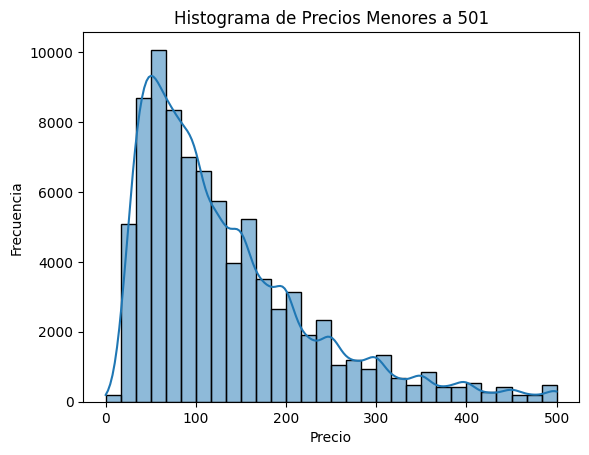

In [9]:
#Analisis de la Frecuencia con respecto al precio de manera general
precios_menor = DataImportante[DataImportante['price'] < 501]

sns.histplot(precios_menor['price'], bins=30, kde=True)
plt.title("Histograma de Precios Menores a 501")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

En el histograma, al limitar los precios a menos de 1000 dolares, podemos analizar con detalle la distribución de los alquileres que son asequibles para la mayoría de las personas. Este gráfico nos muestra cuántos alquileres caen dentro de diferentes rangos de precios, lo que es esencial para comprender la disponibilidad y accesibilidad de viviendas dentro del presupuesto de un gran segmento de la población. Asimismo, el histograma puede revelar tendencias de densidad en ciertos rangos de precios, proporcionando información valiosa sobre las preferencias y demandas de los inquilinos en Londres.



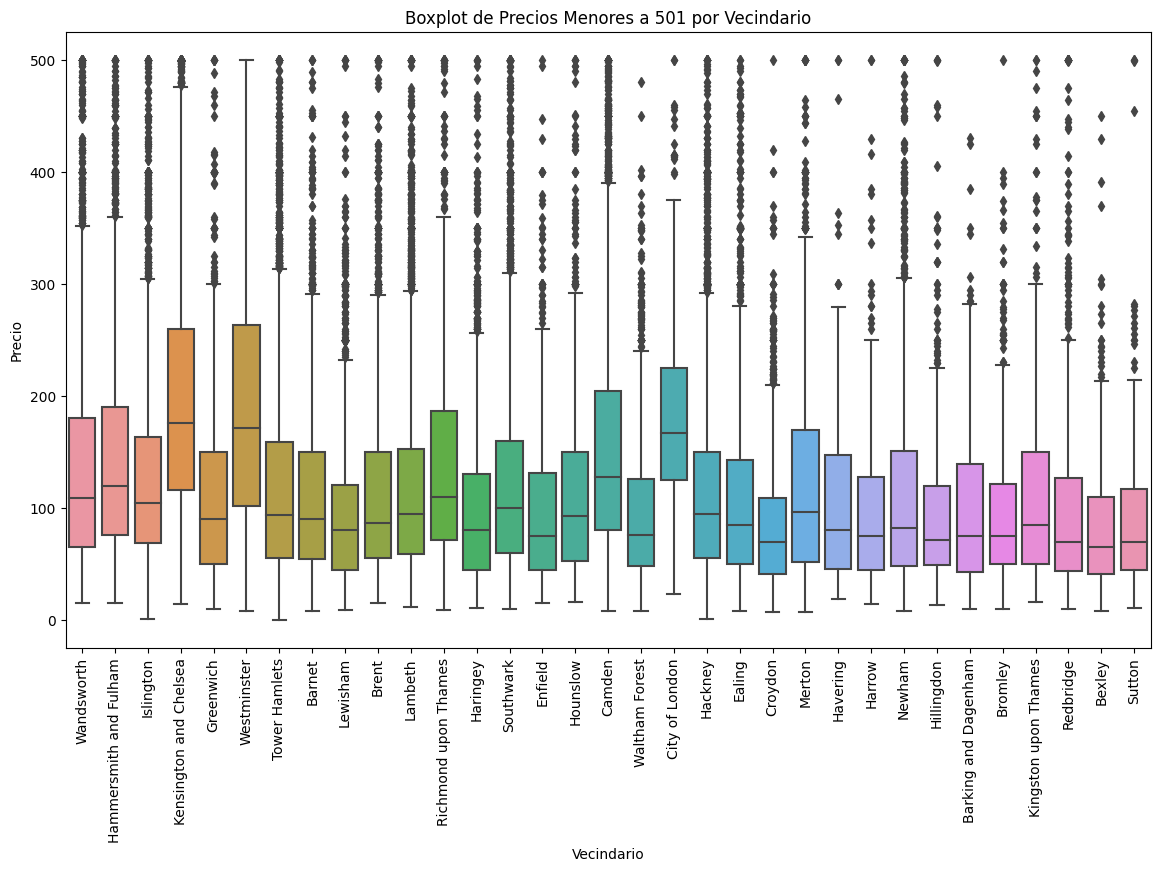

In [10]:
plt.figure(figsize=(14, 8))
precios_menor_1000 = DataImportante[DataImportante['price'] < 501]
sns.boxplot(data=precios_menor_1000, x='neighbourhood_cleansed', y='price')
plt.title("Boxplot de Precios Menores a 501 por Vecindario")
plt.xlabel("Vecindario")
plt.ylabel("Precio")
plt.xticks(rotation=90)
plt.show()

En el boxplot, cada caja representa un vecindario (neighbourhood_cleansed), permitiéndonos comparar visualmente los rangos de precios entre distintos vecindarios. Observamos la mediana del precio, que nos da una idea del valor típico de los alquileres en cada área. Los bigotes del boxplot nos indican la variabilidad de los precios en cada vecindario; si los bigotes son largos, significa que la variación de precios es amplia en ese vecindario. Además, podemos identificar valores atípicos, es decir, alquileres que se desvían significativamente del rango de precios típicos en un vecindario en particular. Esto es crucial para entender las disparidades económicas y de mercado entre diferentes áreas de Londres.

In [11]:
# Creamos una copia del DataFrame para evitar la advertencia SettingWithCopyWarning
DataImportante_clean = DataImportante.dropna(subset=['price', 'review_scores_rating']).copy()

# Calculamos y muestramos las estadísticas descriptivas
mediana_price = DataImportante_clean['price'].median()
media_price = DataImportante_clean['price'].mean()
moda_price = DataImportante_clean['price'].mode().values[0]
desviacion_estandar_price = DataImportante_clean['price'].std()

#Aqui veremos la mediana , Media , Moda y desviacion estandar

print(f"Mediana de price: {mediana_price}")
print(f"Media de price: {media_price}")
print(f"Moda de price: {moda_price}")
print(f"Desviación estándar de price: {desviacion_estandar_price}")

#Ahora veremos un metodo no grafico para todos estos datos
DataImportante.describe()

Mediana de price: 102.0
Media de price: 130.8662292405739
Moda de price: 100.0
Desviación estándar de price: 93.36592970255268


,id,host_id,price,review_scores_rating,latitude,longitude
count,8.386900e+04,8.386900e+04,83869.000000,63706.000000,83869.000000,83869.000000
mean,3.539185e+17,1.579613e+08,132.539937,4.598682,51.509485,-0.126581
std,4.121836e+17,1.700338e+08,95.950812,0.746280,0.049432,0.100878
min,1.391300e+04,4.775000e+03,0.000000,0.000000,51.295937,-0.497800
25%,2.172573e+07,2.112946e+07,60.000000,4.500000,51.482100,-0.189670
50%,4.779529e+07,7.710142e+07,103.000000,4.820000,51.513954,-0.123920
75%,8.135059e+17,2.678701e+08,176.000000,5.000000,51.540180,-0.065980
max,9.738958e+17,5.355140e+08,501.000000,5.000000,51.681642,0.295731


**ANTES DE ANALIZAR CUALQUIER PRECIO, VECINDARIO Y SCORE, TENDREMOS QUE ELEGIR QUE VENCIDARIOS USAREMOS PARA REALIZAR EL ANALISIS DEL TRANSITO**

In [12]:
#Realizamos una vista previa de todos nuestros datos
DataImportante.head()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
0,92644,498201,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,Dee Dee,f,NaN,Wandsworth,42.0,4.57,51.44201,-0.18739
1,93015,499704,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,Sarah,f,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,175.0,4.82,51.49993,-0.21707
2,13913,54730,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,Alina,f,"Islington, Greater London, United Kingdom",Islington,79.0,4.80,51.56861,-0.11270
3,15400,60302,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,Philippa,f,"London, United Kingdom",Kensington and Chelsea,150.0,4.80,51.48780,-0.16813
4,93734,497514,<b>During your stay</b><br />I’m a professiona...,NaN,William,t,NaN,Greenwich,46.0,4.62,51.47618,0.01442


In [13]:
#Creamos una libreria de los mejores lugares turisticos de London con su respectiva laditud y longitud ("Para poder saber la distancia hacia los demas vecindarios")
lugares_turisticos = {
    "Camden Town": {"latitude": 51.5398, "longitude": -0.1426},
    "Big Ben y el Parlamento": {"latitude": 51.5007, "longitude": -0.1246},
    "London Eye": {"latitude": 51.5034, "longitude": -0.1195},
    "Torre de Londres": {"latitude": 51.5074, "longitude": -0.0760},
    "Abadía de Westminster": {"latitude": 51.4993, "longitude": -0.1273},
    "The Shard": {"latitude": 51.5045, "longitude": -0.0865},
    "Palacio de Buckingham": {"latitude": 51.5014, "longitude": -0.1405},
    "Trafalgar Square y Piccadilly Circus": {"latitude": 51.5099, "longitude": -0.1285},
    "British Museum": {"latitude": 51.5194, "longitude": -0.1270},
    "Hyde Park y los jardines de Kensington": {"latitude": 51.5073, "longitude": -0.1760}
}

**Los lugares más cercanos**

In [14]:
resultados_cercanos = {}

for lugar, coordenadas in lugares_turisticos.items():
    lat_turistico = coordenadas["latitude"]
    lon_turistico = coordenadas["longitude"]

    # Calcular distancias euclidianas
    Data["distancia"] = np.sqrt((Data["latitude"] - lat_turistico) ** 2 + (Data["longitude"] - lon_turistico) ** 2)

    # Ordenar por distancia y obtener los 5 lugares más cercanos
    lugares_cercanos = Data.nsmallest(5, "distancia")

    # Almacenar la información en el diccionario
    resultados_cercanos[lugar] = lugares_cercanos[['id', 'host_id', 'description', 'neighborhood_overview', 'host_name', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed', 'price', 'review_scores_rating', 'latitude', 'longitude']].to_dict('records')

# Ahora, 'resultados_cercanos' contiene la información de los 5 lugares más cercanos para cada lugar turístico.

In [15]:
# Resultados para Camden Town
resultados_camden_town = resultados_cercanos["Camden Town"]

# Imprimir los resultados
for i, resultado in enumerate(resultados_camden_town):
    print(f"Resultado {i + 1}:")
    for key, value in resultado.items():
        print(f"{key}: {value}")
    print()

Resultado 1:
id: 857243891176586952
host_id: 12291293
description: Apartment is located in the Camden district of London, close to Camden Market. 13 minutes walk to Regent's Park and 2.9 km from British Museum.<br /><br />Our apartment has free WiFi and a washing machine.<br /><br /><b>The space</b><br />Featuring a kitchen with a microwave, a dishwasher, and a fridge, a flat-screen TV, ironing facilities, a dining area, and a seating area with a sofa. There's a private bathroom with a shower.<br /><br />King's Cross Theatre is a 20-minute walk from the accommodation, while Regent's Park is approximately 13 minutes walk. The nearest airport is London City Airport, 10.6 miles by car and approximately 41 minutes via underground tube from Luxury Central London North Apartment.<br /><br /><b>Other things to note</b><br />"Our apartment is fitted with CCTV to the front door of the apartment to maintain security". <br /><br />Latest check-in time: 22:00<br /><br />No early check-in and no la

**Los lugares más lejanos**

In [16]:
resultados_lejanos = {}

for lugar, coordenadas in lugares_turisticos.items():
    lat_turistico = coordenadas["latitude"]
    lon_turistico = coordenadas["longitude"]

    # Calcular distancias euclidianas
    Data["distancia"] = np.sqrt((Data["latitude"] - lat_turistico) ** 2 + (Data["longitude"] - lon_turistico) ** 2)

    # Ordenar por distancia y obtener los 5 lugares más lejanos
    lugares_lejanos = Data.nlargest(5, "distancia")

    # Almacenar la información en el diccionario
    resultados_lejanos[lugar] = lugares_lejanos[['id', 'host_id', 'description', 'neighborhood_overview', 'host_name', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed', 'price', 'review_scores_rating', 'latitude', 'longitude']].to_dict('records')

# Ahora, 'resultados_lejanos' contiene la información de los 5 lugares más lejanos para cada lugar turístico.

In [17]:
# Resultados para Camden Town
resultados_camden_town = resultados_lejanos["Camden Town"]

# Imprimir los resultados
for i, resultado in enumerate(resultados_camden_town):
    print(f"Resultado {i + 1}:")
    for key, value in resultado.items():
        print(f"{key}: {value}")
    print()

Resultado 1:
id: 925770055971667731
host_id: 521190716
description: Forget your worries in this spacious and serene space.
neighborhood_overview: nan
host_name: Taye
host_is_superhost: f
neighbourhood: nan
neighbourhood_cleansed: Havering
price: $70.00
review_scores_rating: 5.0
latitude: 51.55158012495424
longitude: 0.2957306923388894

Resultado 2:
id: 918627736771464576
host_id: 521190716
description: The whole group will be comfortable in this spacious and unique space.
neighborhood_overview: nan
host_name: Taye
host_is_superhost: f
neighbourhood: nan
neighbourhood_cleansed: Havering
price: $88.00
review_scores_rating: nan
latitude: 51.55068
longitude: 0.29466

Resultado 3:
id: 925967726150421955
host_id: 521190716
description: The whole group will be comfortable in this spacious and unique space.
neighborhood_overview: nan
host_name: Taye
host_is_superhost: f
neighbourhood: nan
neighbourhood_cleansed: Havering
price: $100.00
review_scores_rating: nan
latitude: 51.55330872522925
long

**Los lugares más céntricos**


In [18]:
resultados_centricos = {}

for lugar, coordenadas in lugares_turisticos.items():
    lat_turistico = coordenadas["latitude"]
    lon_turistico = coordenadas["longitude"]

    # Calcular la distancia media a las coordenadas del lugar turístico
    Data["distancia"] = np.sqrt((Data["latitude"] - lat_turistico) ** 2 + (Data["longitude"] - lon_turistico) ** 2)
    distancia_media = Data["distancia"].mean()

    # Seleccionar los 2 lugares más céntricos (con distancias medias más pequeñas)
    lugares_centricos = Data[Data["distancia"] < distancia_media].nlargest(5, "review_scores_rating")

    # Almacenar la información en el diccionario
    resultados_centricos[lugar] = lugares_centricos[['id', 'host_id', 'description', 'neighborhood_overview', 'host_name', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed', 'price', 'review_scores_rating', 'latitude', 'longitude']].to_dict('records')

# Ahora, 'resultados_centricos' contiene la información de los 2 lugares más céntricos (en términos de distancia media) para cada lugar turístico.

In [19]:
# Resultados para Camden Town
resultados_camden_town = resultados_centricos["Camden Town"]

# Imprimir los resultados
for i, resultado in enumerate(resultados_camden_town):
    print(f"Resultado {i + 1}:")
    for key, value in resultado.items():
        print(f"{key}: {value}")
    print()

Resultado 1:
id: 38950
host_id: 167107
description: Room 1  GF<br />Bright and Spacious Double Bedroom with fitted wardrobes in 3 Bedroom Victorian Terrace House with Garden on quiet street of North London (N17)<br /><br /><b>The space</b><br />This is Very lovely property, build in 1889 contain 3 Double bedroom  on first floor. On the ground floor: Reception, Study, Kitchen, Dining room we add XXI twist -  Cinema Room with Private Bar area & Wet Room and Garden with BBQ Area, we also have cover patio. <br />Quiet Street Clous to Tube and Transport link <br /><br />Rooms<br />Victorian Terrace House with garden, gym and cinema room, <br />CPZ car park outside the house,<br />10 minutes walk to tube station,<br />2 minutes walk to buss stop, <br /><br />The house is a home for me and hope for you over your stay, so please enjoy and let other enjoy it as well. <br /><br />You will be sharing  the house with other guests including myself, <br />We keep the house clean and tidy at all time

**LUEGO DE SABER LOS LUGARES MAS CERCANOS , LEJANOS Y CENTRICOS VEREMOS EL PROMEDIO DEL PRECIO DE CADA UNO ADEMAS DEL PROMEDIO DE LOS 5**
*   Camden
*   Islington
*   Haringey
*   Hackney
*   Havering

In [20]:
#Sacamos datos unicamente de Camden en una nueva tabla
DataCamden = DataImportante[(DataImportante['neighbourhood_cleansed']=='Camden')]
DataCamden

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
36,127652,134938,"5* rated Airbnb central London apartment, 200+...",My quiet and safe characterful neighbourhood i...,Ron,t,"Camden Town, Greater London, United Kingdom",Camden,185.0,4.88,51.559528,-0.144319
46,137907,67564,Clean modern well-equipped apt in very central...,"Location, location, location! You won't find b...",Liz,t,"London, Fitzrovia, United Kingdom",Camden,200.0,4.69,51.521970,-0.140350
48,45163,199530,Nice room in house in the West Hampstead area ...,"West Hampstead is, to all intents and purposes...",Deb,f,"London, United Kingdom",Camden,45.0,5.00,51.552370,-0.199540
54,47192,212734,"Hi everyone, welcome to my little haven.<br />...",Very quiet and peaceful neighbourhood for bein...,Dino,t,"London, United Kingdom",Camden,54.0,4.82,51.529580,-0.143440
75,172811,806983,<b>The space</b><br />Nice double bedroom in N...,NaN,Elinor,f,NaN,Camden,229.0,NaN,51.547100,-0.179810
...,...,...,...,...,...,...,...,...,...,...,...,...
87866,973150312901863454,228345224,This stylish 2 bed flat in the nearby district...,In the surrounding area you will have plenty t...,Emily & The Air Peace Of Mind Team,f,"Greater London, England, United Kingdom",Camden,344.0,NaN,51.531492,-0.122529
87868,973152509346498737,535479813,Beautiful apartment in the heart of Primrose H...,NaN,Alex,f,NaN,Camden,199.0,NaN,51.541165,-0.152726
87880,973047688173996792,424002168,The whole group will enjoy easy access to ever...,NaN,Avneesh,f,NaN,Camden,100.0,NaN,51.515658,-0.128193
87886,973198340899357026,334242741,I'm happy to invite you to my beautiful 1 Bed ...,"Camden, inner borough of London, England, in t...",Darcey I Smarthost,f,"Greater London, England, United Kingdom",Camden,137.0,NaN,51.535650,-0.142120


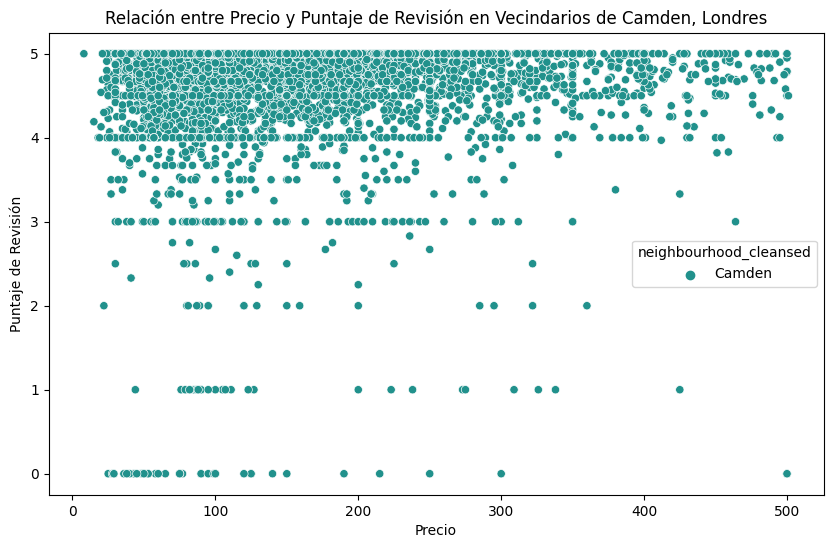

In [21]:
#Realizamos un grafico para ver la relacion entre el precio ,score y frecuencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataCamden, x='price', y='review_scores_rating', hue='neighbourhood_cleansed', palette='viridis')
plt.title('Relación entre Precio y Puntaje de Revisión en Vecindarios de Camden, Londres')
plt.xlabel('Precio')
plt.ylabel('Puntaje de Revisión')
plt.show()

In [22]:
#Sacamos datos unicamente de Islington en una nueva tabla
DataIslington = DataImportante[(DataImportante['neighbourhood_cleansed']=='Islington')]
DataIslington.dropna()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
2,13913,54730,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,Alina,f,"Islington, Greater London, United Kingdom",Islington,79.0,4.80,51.568610,-0.112700
80,179312,858555,Located in Islington Studios this apartment is...,Yes Arsenal Football Stadium is a stones throw...,Larissa,f,"Greater London, England, United Kingdom",Islington,45.0,5.00,51.551910,-0.114970
96,201463,952983,A cute one bedroomed flat in Angel Islington w...,I honestly think Islington is one of the best ...,Debbie,f,"Islington, London, United Kingdom",Islington,129.0,4.34,51.535610,-0.113380
100,81052,438948,A truly unique apartment with a large and brig...,"The restaurants, shops and pubs on Upper Stree...",Aslak,f,"London, United Kingdom",Islington,133.0,5.00,51.539170,-0.102210
109,81635,443041,"""Best views in London - Far exceeded expectati...",I cycle everywhere - it's flat and takes 8 min...,Carol,t,"London, United Kingdom",Islington,115.0,4.94,51.527070,-0.109230
...,...,...,...,...,...,...,...,...,...,...,...,...
84969,955542446537585544,486730857,Welcome to our charming 2-bedroom flat nestled...,Holloway is one of the liveliest and most cosm...,James,f,"Greater London, England, United Kingdom",Islington,78.0,1.00,51.563480,-0.126620
84977,955563612675588186,289951626,Located on a leafy street facing a tranquil ga...,"'Highbury and Canonbury have brilliant bus, tu...",Arman,f,"Greater London, England, United Kingdom",Islington,95.0,5.00,51.544000,-0.099950
85553,959506739530619707,17423847,The Exmouth Market Design Loft<br /><br />Huge...,"* Central London, Zone 1 in Clerkenwell<br />*...",Katie,f,"Greater London, England, United Kingdom",Islington,245.0,5.00,51.524756,-0.108543
86274,963596997014373939,60151108,"Welcome to Camden, London's vibrant and eclect...",Immerse yourself in the energetic atmosphere o...,Anya I Smarthost,f,"Greater London, England, United Kingdom",Islington,133.0,5.00,51.551080,-0.124190


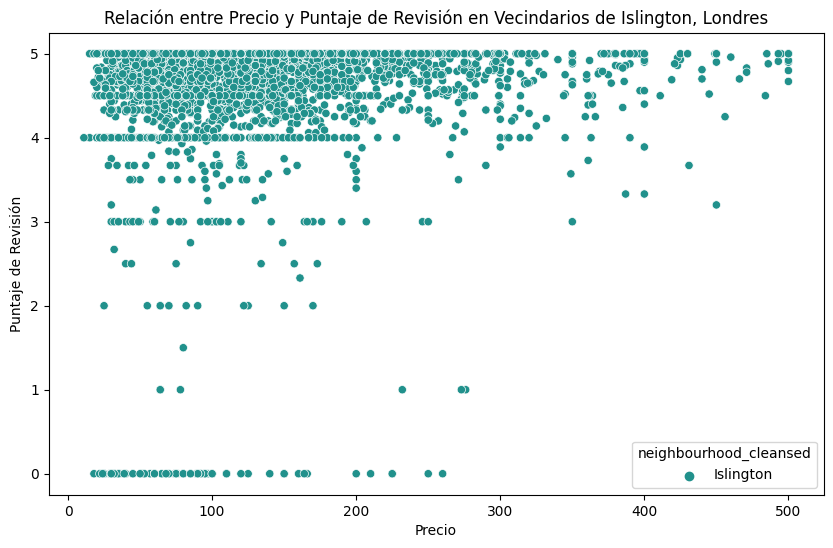

In [23]:
#Realizamos un grafico para ver la relacion entre el precio ,score y frecuencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataIslington, x='price', y='review_scores_rating', hue='neighbourhood_cleansed', palette='viridis')
plt.title('Relación entre Precio y Puntaje de Revisión en Vecindarios de Islington, Londres')
plt.xlabel('Precio')
plt.ylabel('Puntaje de Revisión')
plt.show()

In [24]:
#Sacamos datos unicamente de Islington en una nueva tabla
DataHaringey= DataImportante[(DataImportante['neighbourhood_cleansed']=='Haringey')]
DataHaringey.dropna()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
15,98541,519891,This is a lovely first floor flat in a victori...,"Very Quiet, four parks nearby plus a green roy...",Alicja,f,"Highgate, London , England, United Kingdom",Haringey,90.0,4.46,51.572710,-0.139480
20,36660,157884,<b>Other things to note</b><br />At the moment...,East Finchley is a friendly popular area of No...,Agri & Roger,t,"East Finchley, United Kingdom",Haringey,82.0,4.86,51.584780,-0.160570
23,38950,167107,Room 1 GF<br />Bright and Spacious Double Bed...,"North London N17. West Green, Tottenham",Paul,f,"London, United Kingdom",Haringey,55.0,5.00,51.586840,-0.086320
52,152863,735248,"Modern two bedroom, extremely spacious (950 sq...",About the area:<br /><br />Muswell Hill is a h...,Jamie,f,"Muswell Hill, London, United Kingdom",Haringey,170.0,4.80,51.584090,-0.146250
74,69198,345886,<b>The space</b><br />Single room available to...,The flat is situated in a culturally vibrant a...,Alda,f,"Tottenham, England, United Kingdom",Haringey,53.0,4.46,51.590310,-0.094080
...,...,...,...,...,...,...,...,...,...,...,...,...
83920,949942572422434779,521776723,Welcome to our One bedroom apartment with spac...,"Residental area , Quite hours are 22:00 pm - 8...",Ilham,f,"Greater London, England, United Kingdom",Haringey,76.0,4.25,51.587070,-0.097560
83999,950381428240079800,22514893,Bright and comfy room with dedicated separate ...,"Highgate is a tranquil and leafy neighborhood,...",Laura,f,"Greater London, England, United Kingdom",Haringey,55.0,5.00,51.576402,-0.146209
84250,951950325222181958,154014120,"A charming, bright, self contained studio apar...",amazing neighbourhood with great transport lin...,Dasos,f,"Greater London, England, United Kingdom",Haringey,80.0,4.00,51.577194,-0.146283
85342,958129819148690698,89355192,This charming 3-bedroom home is nestled in the...,The neighborhood boasts a range of amenities d...,Shlome,f,"Greater London, England, United Kingdom",Haringey,163.0,5.00,51.597503,-0.061901


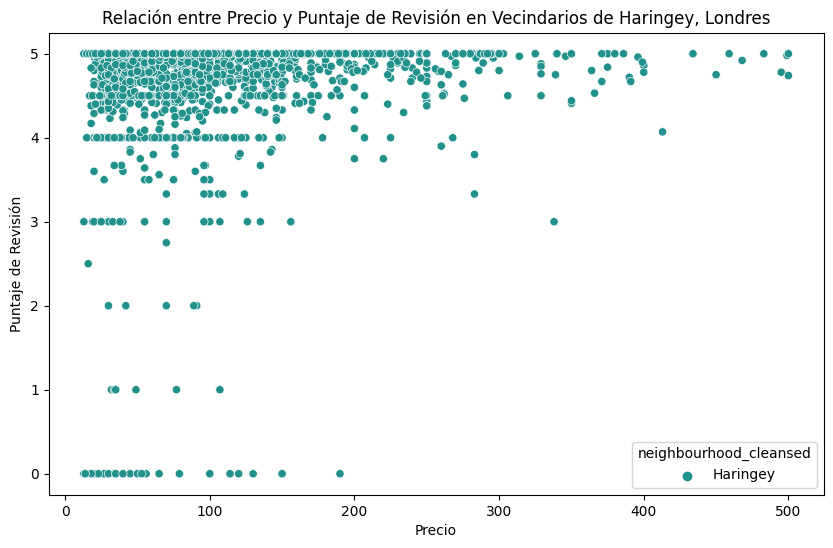

In [25]:
#Realizamos un grafico para ver la relacion entre el precio ,score y frecuencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataHaringey, x='price', y='review_scores_rating', hue='neighbourhood_cleansed', palette='viridis')
plt.title('Relación entre Precio y Puntaje de Revisión en Vecindarios de Haringey, Londres')
plt.xlabel('Precio')
plt.ylabel('Puntaje de Revisión')
plt.show()

In [26]:
DataHackney = DataImportante[(DataImportante['neighbourhood_cleansed']=='Hackney')]
DataHackney.dropna()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
47,142117,192627,Stylish apartment in a quiet area of trendy Sh...,"If a vibrant creative culture, a plethora of c...",Clare,t,"London, United Kingdom",Hackney,200.0,4.92,51.528510,-0.089850
53,46992,211291,"Enjoy a wonderful bedroom, beautiful view, and...","Over the past 10-15 years, Hackney has changed...",Alix,f,"Hackney, England, United Kingdom",Hackney,58.0,4.85,51.551650,-0.052150
76,70482,357352,Fabulous cool and vibey Hackney apartment with...,East London is one of the most culturally rich...,Michael,f,"Greater London, England, United Kingdom",Hackney,180.0,5.00,51.540960,-0.048700
89,190015,917148,The perfect location for summer in London. We ...,Broadway Market in Hackney is the epicentre of...,Sara,f,"Hackney, London, United Kingdom",Hackney,150.0,4.82,51.536777,-0.066182
114,84532,462165,our flat is overlooking the river Lea and it's...,Compared to other London places it's really qu...,Murielle,t,"London, United Kingdom",Hackney,44.0,4.94,51.576656,-0.061099
...,...,...,...,...,...,...,...,...,...,...,...,...
85826,961341371938874112,30362264,A 'small' double room in a recently renovated ...,A well located home you have Regents Row Canal...,Lateef,f,"Greater London, England, United Kingdom",Hackney,29.0,5.00,51.535627,-0.067440
85916,960945063555732004,30327161,Victorian ground floor flat in North Hackney w...,The area is the perfect balance between a loca...,Aldo,f,"Greater London, England, United Kingdom",Hackney,90.0,5.00,51.565870,-0.095510
85928,960974300564313088,416861976,Relax in a family house at this peaceful place...,2 minutes walk to an off-licence where you can...,Brunno,f,"Greater London, England, United Kingdom",Hackney,50.0,5.00,51.537345,-0.069558
85933,961582760354785893,8991833,Enjoy this uniquely designed family friendly p...,Quiet residential neighbourhood but within eas...,Bára,f,"Greater London, England, United Kingdom",Hackney,156.0,5.00,51.555187,-0.036371


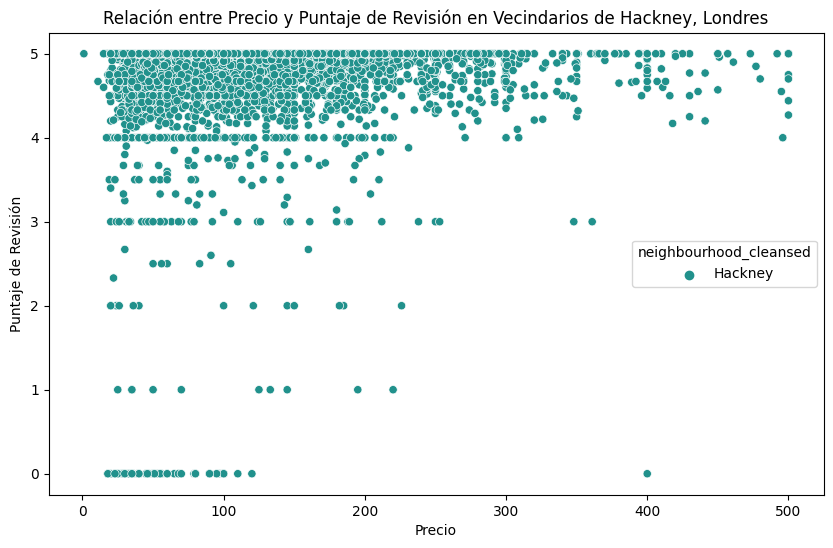

In [27]:
#Realizamos un grafico para ver la relacion entre el precio ,score y frecuencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataHackney, x='price', y='review_scores_rating', hue='neighbourhood_cleansed', palette='viridis')
plt.title('Relación entre Precio y Puntaje de Revisión en Vecindarios de Hackney, Londres')
plt.xlabel('Precio')
plt.ylabel('Puntaje de Revisión')
plt.show()

In [28]:
DataHavering = DataImportante[(DataImportante['neighbourhood_cleansed']=='Havering')]
DataHavering.dropna()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
490,447223,2220786,"Spacious large Semi-detachted Maisonette, a 10...",Market close-by - 3 days per week.<br /><br />...,Hannelore,f,"Romford, United Kingdom",Havering,114.0,4.64,51.578660,0.169210
4117,5699825,29553683,Our self-contained bed flat with a bath kitche...,Very lovely neighbourhood with many attractions.,Grace,f,"Romford, Essex, United Kingdom",Havering,70.0,4.20,51.606600,0.159380
4349,5898268,30633955,Large and well furnished triple room is availa...,It's the most central Romford Town location po...,Vitas,t,"Romford, Greater London, United Kingdom",Havering,35.0,4.90,51.576870,0.180200
5999,7550784,39525381,This Large one bedroom Bungalow is fully furn...,"Hornchurch is an suburban town in East London,...",Arif,f,"Hornchurch, Essex, United Kingdom",Havering,93.0,5.00,51.584660,0.220160
7227,8838008,28041621,This is a very generous and spacious modern ho...,There is room for up to 3 cars (one garage spa...,Julia,f,"Romford, England, United Kingdom",Havering,300.0,5.00,51.592400,0.229700
...,...,...,...,...,...,...,...,...,...,...,...,...
77684,914454151703550864,338286700,"Kick back and relax in this new-build, stylish...","Quiet building amongst independent, working pr...",Tyra,f,"Greater London, England, United Kingdom",Havering,90.0,4.75,51.523640,0.171310
78107,917285767223312737,210284229,Our modern apartment in Romford is a beautiful...,"The location of the apartment is unbeatable, w...",Kimberly,f,"Greater London, England, United Kingdom",Havering,89.0,5.00,51.579040,0.168394
80270,931149153234800765,510677218,"Visit our stylish Hornchurch home, walking di...","Ideal location for families, business travelle...",Alexandra,f,"Greater London, England, United Kingdom",Havering,187.0,5.00,51.557330,0.217940
80317,931287037824997645,521161953,A Double bedroom in newly refurbished house...,Please don’t park either of the neighbours par...,Chandrika,f,"Greater London, England, United Kingdom",Havering,46.0,4.83,51.598533,0.173973


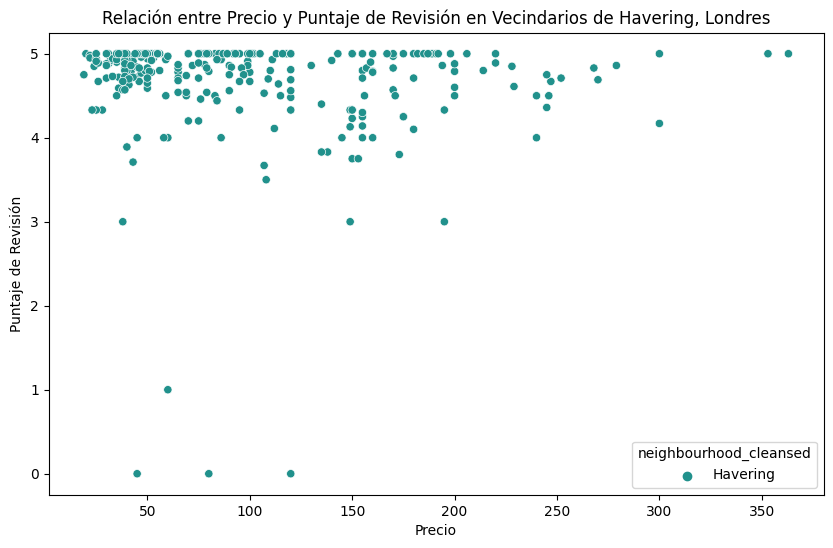

In [29]:
#Realizamos un grafico para ver la relacion entre el precio ,score y frecuencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataHavering, x='price', y='review_scores_rating', hue='neighbourhood_cleansed', palette='viridis')
plt.title('Relación entre Precio y Puntaje de Revisión en Vecindarios de Havering, Londres')
plt.xlabel('Precio')
plt.ylabel('Puntaje de Revisión')
plt.show()

In [30]:
#Realizamos una nueva tabla con los 5 vecindarios para realizar un analisis entre ellos
neighborhoods = ['Camden', 'Havering', 'Hackney', 'Haringey', 'Islington']
DataAnalisis = DataImportante[DataImportante['neighbourhood_cleansed'].isin(neighborhoods)]
DataAnalisis.dropna()

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
2,13913,54730,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,Alina,f,"Islington, Greater London, United Kingdom",Islington,79.0,4.80,51.568610,-0.112700
15,98541,519891,This is a lovely first floor flat in a victori...,"Very Quiet, four parks nearby plus a green roy...",Alicja,f,"Highgate, London , England, United Kingdom",Haringey,90.0,4.46,51.572710,-0.139480
20,36660,157884,<b>Other things to note</b><br />At the moment...,East Finchley is a friendly popular area of No...,Agri & Roger,t,"East Finchley, United Kingdom",Haringey,82.0,4.86,51.584780,-0.160570
23,38950,167107,Room 1 GF<br />Bright and Spacious Double Bed...,"North London N17. West Green, Tottenham",Paul,f,"London, United Kingdom",Haringey,55.0,5.00,51.586840,-0.086320
36,127652,134938,"5* rated Airbnb central London apartment, 200+...",My quiet and safe characterful neighbourhood i...,Ron,t,"Camden Town, Greater London, United Kingdom",Camden,185.0,4.88,51.559528,-0.144319
...,...,...,...,...,...,...,...,...,...,...,...,...
86168,962819066808184263,533033660,The apartment is located in an excellent locat...,"Busy residential area, canal and park nearby,...",Toufiq,f,"Greater London, England, United Kingdom",Camden,41.0,5.00,51.540064,-0.139749
86177,963129126963032303,32423116,Welcome to our fantastic villa in the heart of...,Being London's one of the most exciting and mo...,Zack,t,"Greater London, England, United Kingdom",Camden,311.0,5.00,51.540726,-0.133588
86274,963596997014373939,60151108,"Welcome to Camden, London's vibrant and eclect...",Immerse yourself in the energetic atmosphere o...,Anya I Smarthost,f,"Greater London, England, United Kingdom",Islington,133.0,5.00,51.551080,-0.124190
86567,965157199794983090,464734682,Lovely 2 Bed flat in Central London Zone 1 Sho...,Shoreditch. Central London Zone 1. In the he...,Rich,f,"Greater London, England, United Kingdom",Hackney,154.0,5.00,51.528251,-0.076449


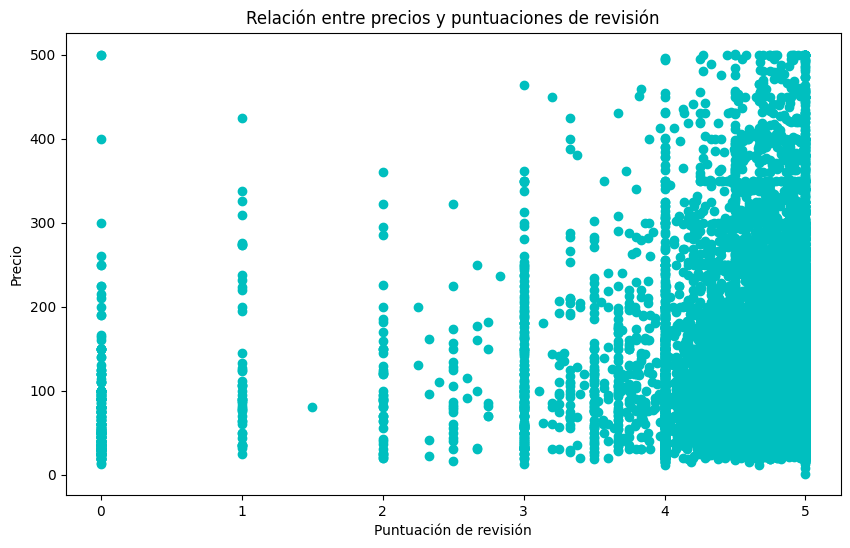

In [31]:
# Crear un gráfico de dispersión para visualizar la relación entre precios y puntuaciones de revisión
df_scatter = DataAnalisis[['price', 'review_scores_rating']]
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['review_scores_rating'], df_scatter['price'], alpha=1, color='c')
plt.title('Relación entre precios y puntuaciones de revisión')
plt.xlabel('Puntuación de revisión')
plt.ylabel('Precio')
plt.show()

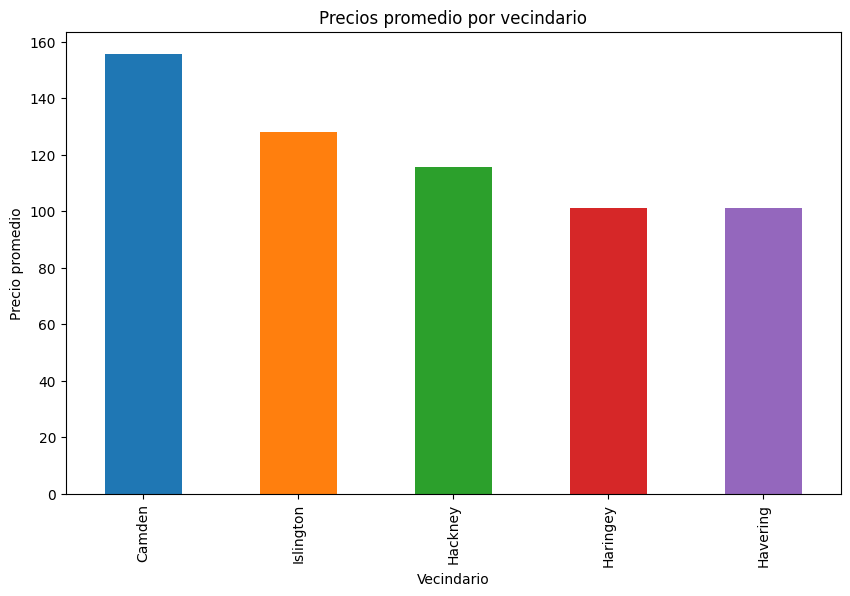

In [32]:
#Analisis de los precios promedio de los 5 vecindarios
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10")
DataAnalisis.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).plot(kind='bar', color=palette)
plt.title('Precios promedio por vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Precio promedio')
plt.show()

**INFORMACIÓN ADICIONAL**

*   **Camdem**  (Metro: 2,
Autobuses: 4,
Trenes: 30)
*   **Islington** (Metro: 4,
Autobuses: 0,
Trenes: 10)
*   **Haringey** (Metro: 9,
Autobuses: 0,
Trenes: 10)
*   **Hackney** (Metro: 10,
Autobuses: 0,
Trenes: 12)
*   **Havering** (Metro: 6,
Autobuses: 0,
Trenes: 4)

*Información sacada de Google Maps*




## **3. Análisis sobre Reviews (comentarios)**

---

In [33]:
Review

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."
...,...,...,...,...,...,...
1581028,971887875299343051,973108321598840305,2023-09-04,532269963,Lamyae,We had a great stay at khalid place It was exa...
1581029,970295459665929952,973125058284346062,2023-09-04,814456,Jose,"Nice place in a very nice location, very quite..."
1581030,970371341816641811,972368731470763706,2023-09-03,208891911,Anjuman,Elza est une hôte très réactive et amicale. L’...
1581031,970371341816641811,973812238966134743,2023-09-05,458483914,Recep,"The place was clean and felt cosy, had a lot o..."


In [34]:
Review.info() #Variables del csv de Reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581033 entries, 0 to 1581032
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1581033 non-null  int64 
 1   id             1581033 non-null  int64 
 2   date           1581033 non-null  object
 3   reviewer_id    1581033 non-null  int64 
 4   reviewer_name  1581033 non-null  object
 5   comments       1580896 non-null  object
dtypes: int64(3), object(3)
memory usage: 72.4+ MB


In [35]:
Review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


### **Comentarios/Reviews de los 5 lugares más centricos**

#### **1er lugar:**

In [36]:
dfR=Review[Review['listing_id'] == 38950]
dfR

,listing_id,id,date,reviewer_id,reviewer_name,comments
5154,38950,515763561704624536,2021-12-12,40510980,Sven,Paul is a dream host. He is very approachable ...


In [37]:
text=" ".join(review for review in dfR["comments"])
text

'Paul is a dream host. He is very approachable and very open in communicating. You can ask him anything, and he is very knowledgeable about the neighborhood (shops, restaurants, public transport, things to do) and the house and its history.'

In [38]:
DataImportante[DataImportante["id"]== 38950]

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
23,38950,167107,Room 1 GF<br />Bright and Spacious Double Bed...,"North London N17. West Green, Tottenham",Paul,f,"London, United Kingdom",Haringey,55.0,5.0,51.58684,-0.08632


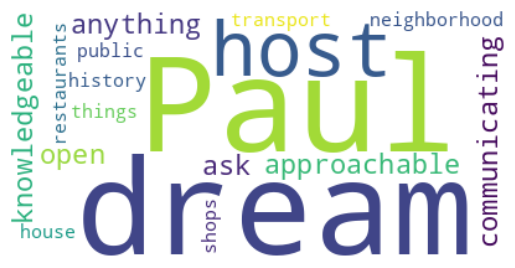

In [39]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **2do lugar:**

In [40]:
dfR1=Review[Review['listing_id'] == 45163]
dfR1

,listing_id,id,date,reviewer_id,reviewer_name,comments
8865,45163,50262533,2015-10-10,1960484,Danny,The host canceled this reservation 2 days befo...
8880,45163,486044860622460119,2021-11-01,63911174,Sacha,Fabulous stay! A great flat in a very conveni...


In [41]:
text1=" ".join(review for review in dfR1["comments"])
text1

'The host canceled this reservation 2 days before arrival. This is an automated posting. Fabulous stay!  A great flat in a very convenient location.  Room was exactly as pictured with your very own washroom!  A lovely host and good conversations. I will definitely be back!'

In [42]:
DataImportante[DataImportante["id"]== 45163]

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
48,45163,199530,Nice room in house in the West Hampstead area ...,"West Hampstead is, to all intents and purposes...",Deb,f,"London, United Kingdom",Camden,45.0,5.0,51.55237,-0.19954


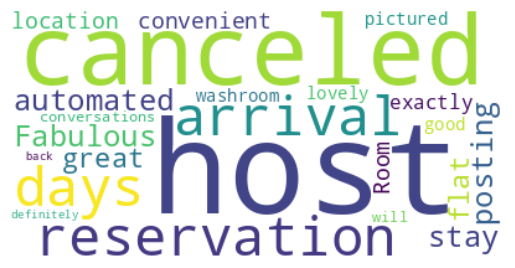

In [43]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **3er lugar:**

In [44]:
dfR2=Review[Review['listing_id'] == 154221]
dfR2

,listing_id,id,date,reviewer_id,reviewer_name,comments
5813,154221,59561487,2016-01-12,1655084,Daria,Small and cosy flat with all goods you need in...


In [45]:
text2=" ".join(review for review in dfR2["comments"])
text2

'Small and cosy flat with all goods you need in a perfect location. Everything is nearby: 3 min to pimlico, 7 to Victoria station. Lots of good restaurants, parks and museums.'

In [46]:
DataImportante[DataImportante["id"]== 154221]

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
55,154221,211018,"hi, i am renting my 2 bedroom flat in Pimlico ...","a very save area of central London , Pimlico i...",Sylvia,f,"London, England, United Kingdom",Westminster,83.0,5.0,51.4897,-0.13911


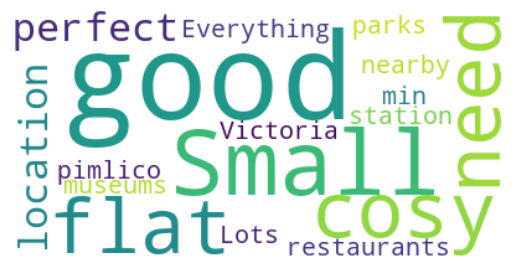

In [47]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **4to lugar:**

In [48]:
dfR3=Review[Review['listing_id'] == 70482]
dfR3

,listing_id,id,date,reviewer_id,reviewer_name,comments
14136,70482,658504922376488331,2022-06-27,17605449,Jemayel,"Great place! It's a cool, vibey 1 bedroom in a..."
14148,70482,705589347294823718,2022-08-31,11232676,Melissa,My husband and I stayed here for a week and it...


In [49]:
text3=" ".join(review for review in dfR3["comments"])
text3

"Great place! It's a cool, vibey 1 bedroom in a really nice neighborhood with a roof patio. Hackney Village is a five minute walk, which has a couple cool pubs, good food, and essentials shops. Just beyond is Victoria Park, which is huge and rad and has a lovely cafe where I ate salmon bagels  literally every day. I walked to and fro from parties and gigs in east London. It was idyllic. Clearly, would recommend. Michael is super easy to deal with, super present, and the neighbors are all very chill too. My husband and I stayed here for a week and it was wonderful.  The neighborhood is very beautiful with lots of good restaurants, coffee shops, and stores very close by. We really enjoyed walking through Victoria Park and having breakfast at the Pavilion.  The place is also located close to bus stops making it easy to get around London. The apartment had everything we needed. The bed was super comfortable and the rooftop patio was also very nice.  Michael is a great host! Very communicat

In [50]:
DataImportante[DataImportante["id"]== 70482]

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
76,70482,357352,Fabulous cool and vibey Hackney apartment with...,East London is one of the most culturally rich...,Michael,f,"Greater London, England, United Kingdom",Hackney,180.0,5.0,51.54096,-0.0487


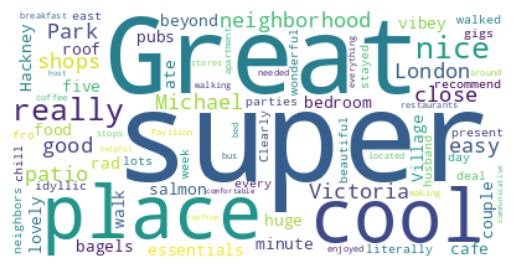

In [51]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate(text3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **5to lugar:**

In [52]:
dfR4=Review[Review['listing_id'] == 179312]
dfR4

,listing_id,id,date,reviewer_id,reviewer_name,comments
8707,179312,166371587,2017-07-03,5879394,Alexander,"Larissa was a great host, we booked her apartm..."
8708,179312,192898684,2017-09-11,41852314,Romy,"Larissa's flat was amazing: very spacious, ver..."
8709,179312,194286681,2017-09-16,4506082,Sarah,The apartment is beautiful and has everything ...
8710,179312,216572711,2017-12-04,1741058,Frankie,Larissa's apartment is a wonderful find in bus...
8711,179312,220216552,2017-12-21,9732506,Laetitia,Je recommande vivement l'appartement de Lariss...
8712,179312,227981323,2018-01-17,163656284,Stephen,"Great location, really close to the tube, supe..."
8713,179312,272290674,2018-06-03,2070751,Antoniya,"Beautiful and comfortable flat, located 1 minu..."


In [53]:
text4=" ".join(review for review in dfR4["comments"])
text4

"Larissa was a great host, we booked her apartment for my parents to stay in as they were visiting the area. Check in and communication was great, the flat was super clean and all as described. Lovely area, great location really close to the tube station and lots of restaurants, bars etc. The development the flat is located in is really peaceful and with beautiful gardens. Would absolutely recommend to stay here.  Larissa's flat was amazing: very spacious, very clean and nice interior design. Communication was perfect and Larissa was super flexible with my check-in and check-out times which I really appreciated! Thanks again for such a nice stay! The apartment is beautiful and has everything you need: access, transport links, security and close proximity to central London. It's also equipped with everyday essentials and more, including an eclectic selection of books. The host was very warm and accommodating. It was a pleasure to spend a few days here. Highly recommended. Larissa's apar

In [54]:
DataImportante[DataImportante["id"]== 179312]

,id,host_id,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,price,review_scores_rating,latitude,longitude
80,179312,858555,Located in Islington Studios this apartment is...,Yes Arsenal Football Stadium is a stones throw...,Larissa,f,"Greater London, England, United Kingdom",Islington,45.0,5.0,51.55191,-0.11497


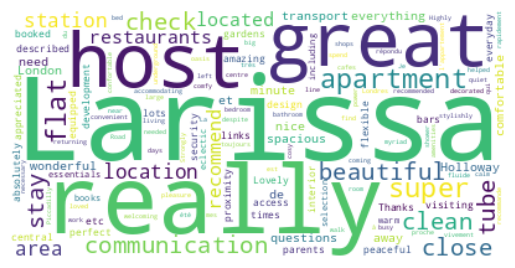

In [55]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate(text4)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Conclusiones de este apartado:** Al elegir el análisis de los 5 lugares más céntricos, podemos observar que estos alojamientos cuentan con una muy buena recepción por parte de los usuarios. Y no solo por sus instalaciones, sino también por sus *hosts*. Podríamos afirmar que son alojamientos recomendados para la visita de las personas.